#Загружаем Датасет#

#TODO

*   провести encoding location
*   провести feature engineering
*   Изучить насколько хорошие результаты
*   Подумать как улучшить





In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Hyderabad.csv to Hyderabad.csv
User uploaded file "Hyderabad.csv" with length 253067 bytes


In [4]:
!ls

Hyderabad.csv  sample_data


In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv('Hyderabad.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2518 non-null   int64 
 1   Area                 2518 non-null   int64 
 2   Location             2518 non-null   object
 3   No. of Bedrooms      2518 non-null   int64 
 4   Resale               2518 non-null   int64 
 5   MaintenanceStaff     2518 non-null   int64 
 6   Gymnasium            2518 non-null   int64 
 7   SwimmingPool         2518 non-null   int64 
 8   LandscapedGardens    2518 non-null   int64 
 9   JoggingTrack         2518 non-null   int64 
 10  RainWaterHarvesting  2518 non-null   int64 
 11  IndoorGames          2518 non-null   int64 
 12  ShoppingMall         2518 non-null   int64 
 13  Intercom             2518 non-null   int64 
 14  SportsFacility       2518 non-null   int64 
 15  ATM                  2518 non-null   int64 
 16  ClubHo

In [10]:
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [89]:
X = data.drop(['Price', 'Location'], axis=1)
y = data['Price']
X.shape, y.shape

((2518, 38), (2518,))

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()

# Обучение модели
lr_model.fit(X, y)

# Прогнозирование целевой переменной и сохранение результата в predicted_y
y_pred = lr_model.predict(X)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Вычисление RMSE
error = rmse(y, y_pred)
print(f"RMSE: {error}")
# print(f"R2: {lr_model.score}")

RMSE: 5010649.793701803
R2: <bound method RegressorMixin.score of LinearRegression()>


In [69]:
# Импорт функции cross_val_score из модуля model_selection scikit-learn
from sklearn.model_selection import cross_val_score

# Сохранение десяти метрик в переменной mse
mse = cross_val_score(lr_model,
                      X,
                      y,
                      scoring='neg_mean_squared_error',
                      cv=10)

# Получение среднего значения для оценки качества модели
mse.mean()

-26429325806845.504

In [25]:
feature = data[['No. of Bedrooms']]
lr_model = LinearRegression()

# Обучение модели
lr_model.fit(feature, y)
predicted_y = lr_model.predict(feature)

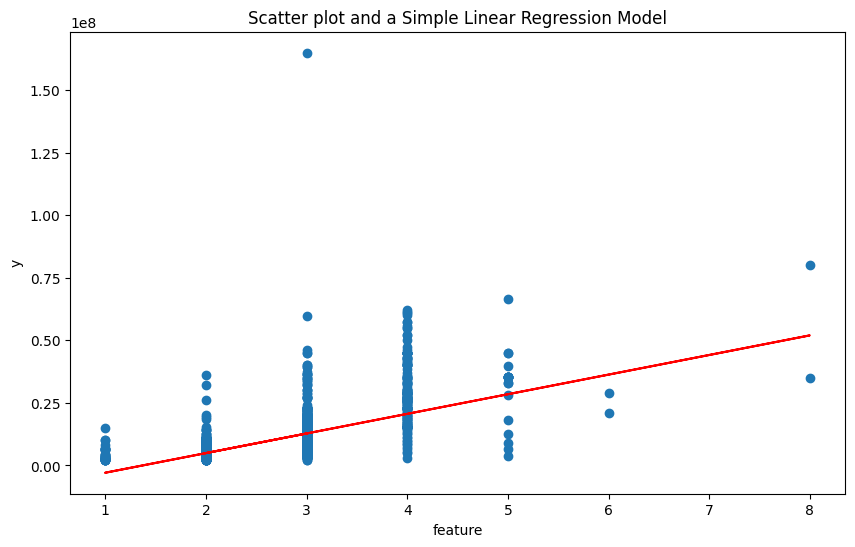

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(feature, y)
plt.plot(feature, predicted_y, c = 'r')
plt.title('Scatter plot and a Simple Linear Regression Model')
plt.ylabel("y")
plt.xlabel("feature")
plt.show()

In [29]:
from sklearn.model_selection import cross_val_score

# Сохранение десяти метрик в переменной mse
mse = cross_val_score(lr_model,
                      feature,
                      y,
                      scoring='neg_mean_squared_error',
                      cv=10)

# Получение среднего значения для оценки качества модели
mse.mean()

-48485616249848.33

In [73]:
X.corr().style.background_gradient(cmap = 'coolwarm')

,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Area,1.000000,0.811345,0.173956,0.049484,0.100558,0.106174,0.087826,0.101188,0.087381,0.090299,0.018300,0.073801,0.045382,0.028329,0.090734,0.011441,0.094614,0.057677,0.088338,0.055595,0.031244,0.080352,0.012568,0.019563,0.017464,0.030748,0.017515,0.088381,0.053828,0.018625,0.093536,0.009712,0.005642,0.020737,0.019974,0.016994,0.019018,0.019559
No. of Bedrooms,0.811345,1.000000,0.147713,0.033735,0.068044,0.075159,0.065082,0.073687,0.061040,0.064930,0.001465,0.052098,0.023987,0.008828,0.060574,-0.004938,0.070735,0.034819,0.073400,0.038221,0.018706,0.053035,-0.004442,0.004827,-0.000210,0.011751,0.004205,0.061890,0.042596,0.004201,0.077648,-0.005604,-0.009795,0.006135,0.004709,-0.000473,0.004308,0.003565
Resale,0.173956,0.147713,1.000000,0.050376,0.019168,0.024131,0.039299,0.045281,0.039433,0.029327,0.046056,0.011795,0.026220,0.047264,0.010619,0.047052,0.060956,0.032569,0.067279,0.037456,0.034071,0.033520,0.051191,0.064535,0.051726,0.073732,0.051293,0.009268,0.044288,0.082796,0.033327,0.057572,0.042491,0.067212,0.071562,0.075197,0.082010,0.064602
MaintenanceStaff,0.049484,0.033735,0.050376,1.000000,0.954656,0.956231,0.965791,0.968489,0.965250,0.966388,0.976774,0.956156,0.962526,0.970007,0.954477,0.979007,0.961172,0.951085,0.959124,0.979354,0.975502,0.970207,0.979218,0.976290,0.964869,0.973427,0.976149,0.952734,0.951287,0.969876,0.964672,0.971251,0.980487,0.975782,0.973526,0.972883,0.974483,0.976001
Gymnasium,0.100558,0.068044,0.019168,0.954656,1.000000,0.990227,0.974797,0.973042,0.965382,0.975676,0.954947,0.967702,0.971270,0.958226,0.984171,0.953121,0.965069,0.959657,0.952590,0.956443,0.959253,0.969518,0.953547,0.952377,0.944595,0.951390,0.953315,0.985011,0.957641,0.942565,0.960195,0.946353,0.954882,0.952141,0.951877,0.951203,0.948619,0.952467
SwimmingPool,0.106174,0.075159,0.024131,0.956231,0.990227,1.000000,0.977844,0.976331,0.969209,0.976384,0.956159,0.967481,0.971431,0.959998,0.984636,0.954030,0.967883,0.958045,0.956479,0.958391,0.961307,0.970210,0.954456,0.953306,0.945449,0.952297,0.954324,0.981002,0.956559,0.943289,0.963072,0.947342,0.956274,0.952639,0.952533,0.951266,0.948895,0.953208
LandscapedGardens,0.087826,0.065082,0.039299,0.965791,0.974797,0.977844,1.000000,0.983036,0.974892,0.983603,0.963878,0.957578,0.961671,0.968888,0.970168,0.961096,0.976517,0.952639,0.970146,0.965305,0.964734,0.974685,0.961307,0.958128,0.947398,0.954912,0.961278,0.966937,0.953519,0.950384,0.970965,0.953352,0.962053,0.957023,0.956943,0.956865,0.957239,0.958737
JoggingTrack,0.101188,0.073687,0.045281,0.968489,0.973042,0.976331,0.983036,1.000000,0.978260,0.982366,0.969148,0.960562,0.966388,0.972621,0.973870,0.965829,0.975040,0.951529,0.967874,0.972600,0.971808,0.982341,0.966462,0.962735,0.952299,0.959857,0.963910,0.967830,0.952669,0.952982,0.975775,0.957365,0.966730,0.962255,0.960339,0.959073,0.958167,0.962542
RainWaterHarvesting,0.087381,0.061040,0.039433,0.965250,0.965382,0.969209,0.974892,0.978260,1.000000,0.976553,0.962129,0.956742,0.958124,0.963918,0.964521,0.961166,0.977649,0.952990,0.969683,0.967437,0.961202,0.974054,0.959897,0.957723,0.945512,0.954982,0.959414,0.964372,0.952911,0.948191,0.977532,0.951327,0.962506,0.957676,0.955310,0.954188,0.954137,0.957704
IndoorGames,0.090299,0.064930,0.029327,0.966388,0.975676,0.976384,0.983603,0.982366,0.976553,1.000000,0.963973,0.961153,0.961247,0.969262,0.971343,0.961231,0.970843,0.949503,0.961969,0.965580,0.969784,0.979579,0.961865,0.959503,0.947409,0.955682,0.961483,0.970590,0.949691,0.949114,0.969377,0.954210,0.963689,0.958392,0.956395,0.955106,0.955470,0.959086


#Анализ X и y данных#

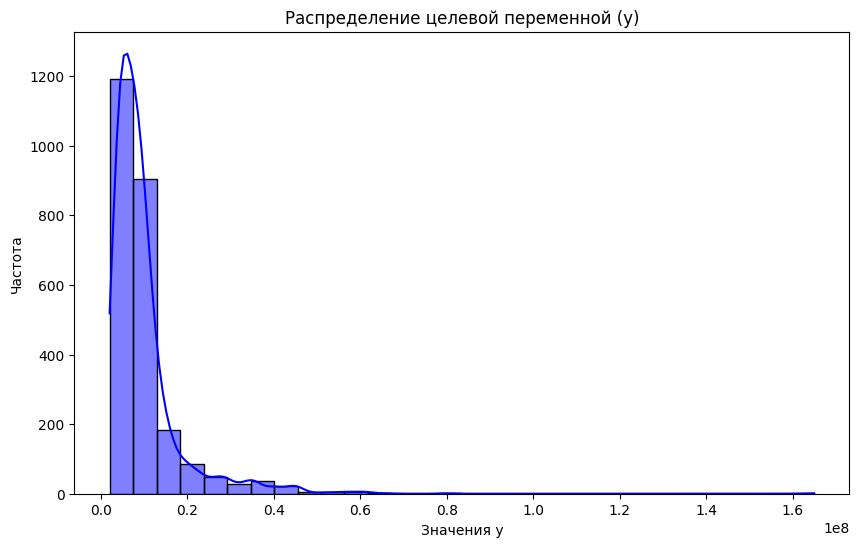

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=30, color='blue')  # kde добавляет линию плотности
plt.title("Распределение целевой переменной (y)")
plt.xlabel("Значения y")
plt.ylabel("Частота")
plt.show()

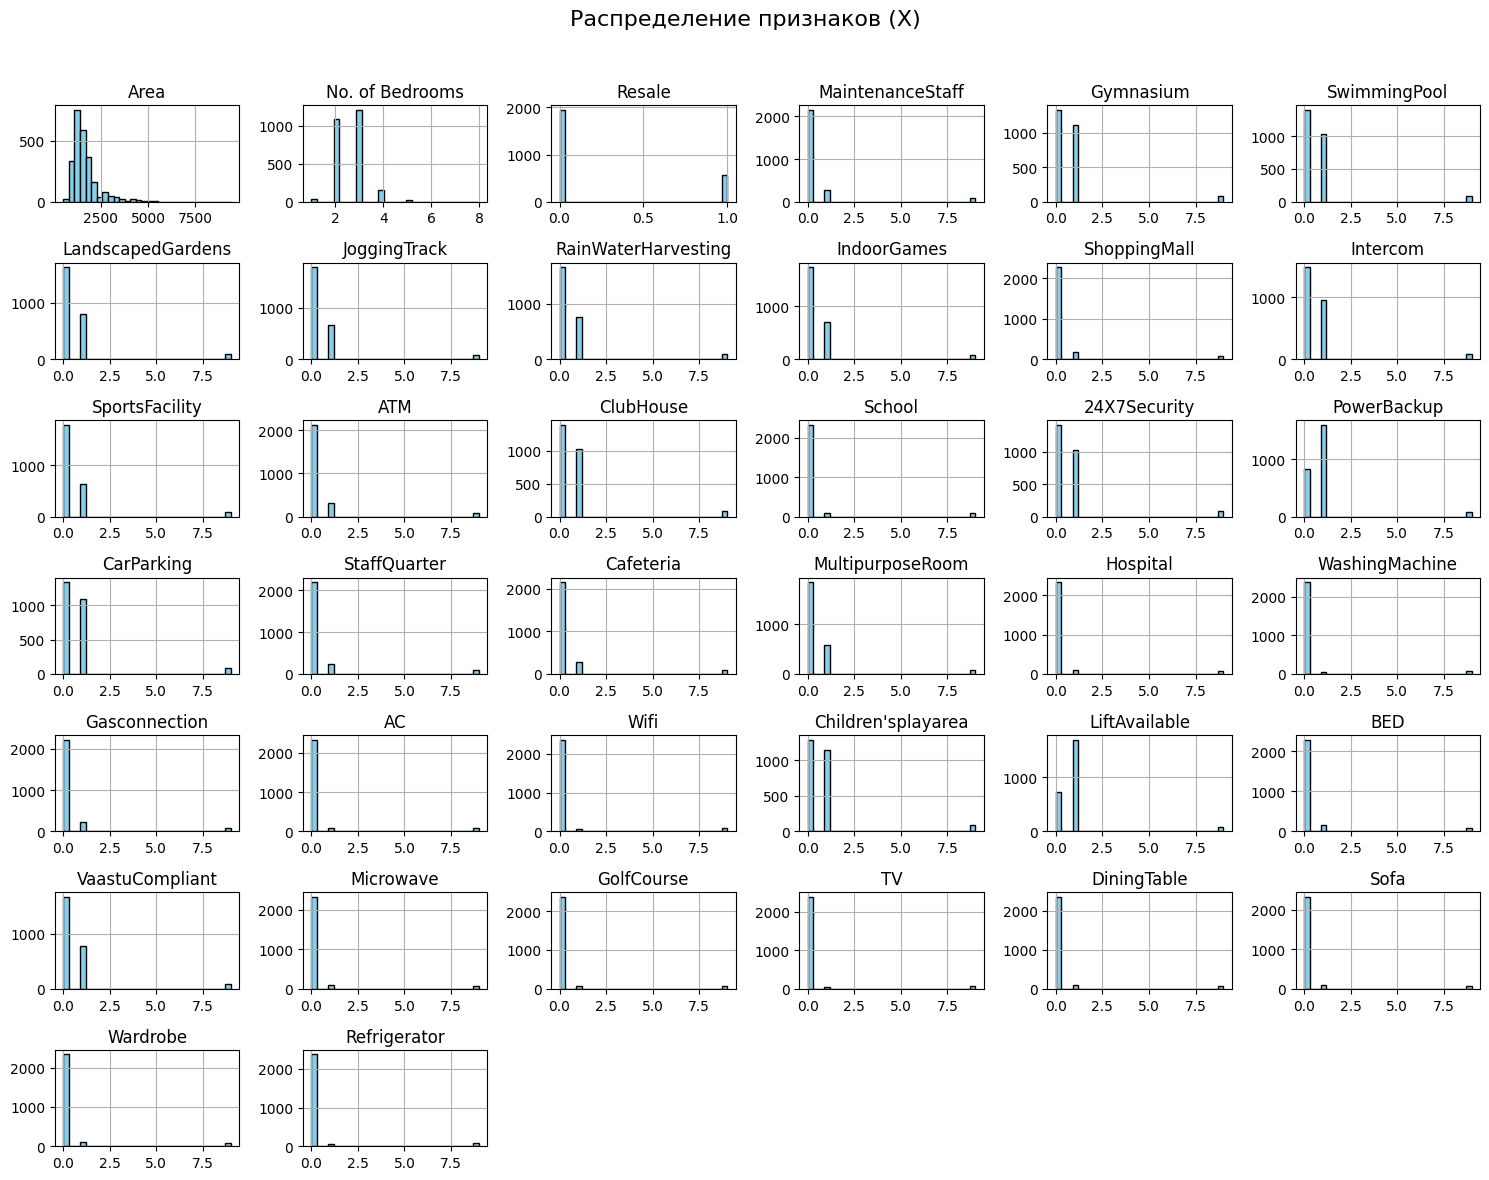

In [35]:
X_df = pd.DataFrame(X, columns=feature_names)  # feature_names — названия столбцов

# Построим гистограммы для всех признаков
X_df.hist(figsize=(15, 12), bins=30, edgecolor='black', color='skyblue')
plt.suptitle("Распределение признаков (X)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Убираем накладывание заголовка
plt.show()

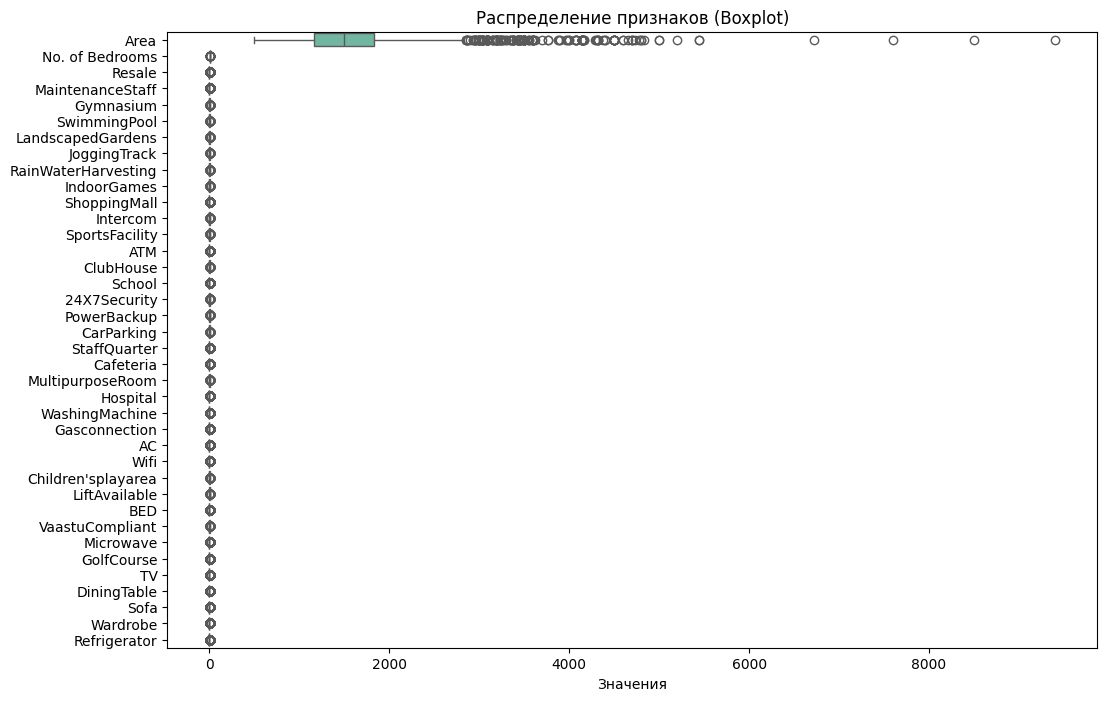

In [50]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X, orient='h', palette="Set2")
plt.title("Распределение признаков (Boxplot)")
plt.xlabel("Значения")
plt.show()

Статистика Шапиро-Уилка: 0.9677525396201804, p-значение: 2.4663554263878532e-23


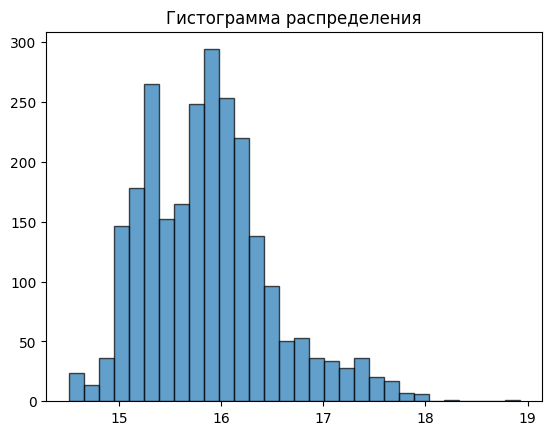

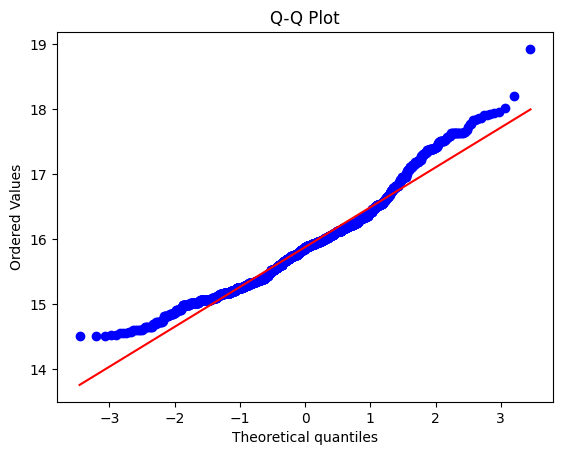

In [60]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro, normaltest

y_log = np.log1p(y)

# Проверка нормальности для целевой переменной
stat, p = shapiro(y_log)
print(f"Статистика Шапиро-Уилка: {stat}, p-значение: {p}")

# Гистограмма
plt.hist(y_log, bins=30, edgecolor='k', alpha=0.7)
plt.title("Гистограмма распределения")
plt.show()

# Q-Q график
stats.probplot(y_log, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


Статистика Шапиро-Уилка: 0.8448265496901788, p-значение: 2.6507777499884166e-44


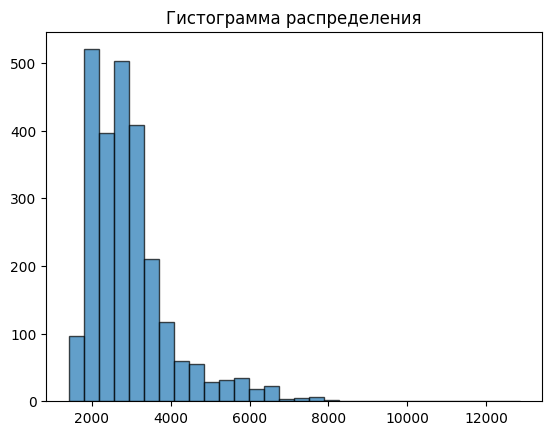

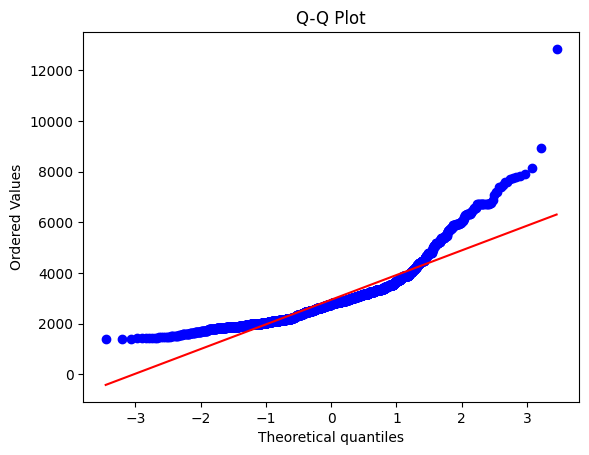

In [58]:
y_sqrt = np.sqrt(y)

stat, p = shapiro(y_sqrt)
print(f"Статистика Шапиро-Уилка: {stat}, p-значение: {p}")

# Гистограмма
plt.hist(y_sqrt, bins=30, edgecolor='k', alpha=0.7)
plt.title("Гистограмма распределения")
plt.show()

# Q-Q график
stats.probplot(y_sqrt, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

Статистика Шапиро-Уилка: 0.9424646235629435, p-значение: 3.0181943325238503e-30


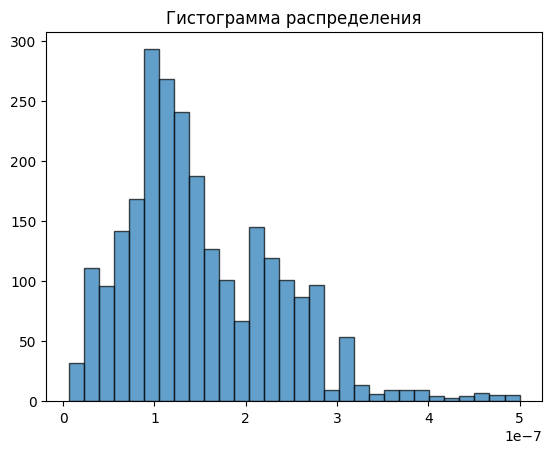

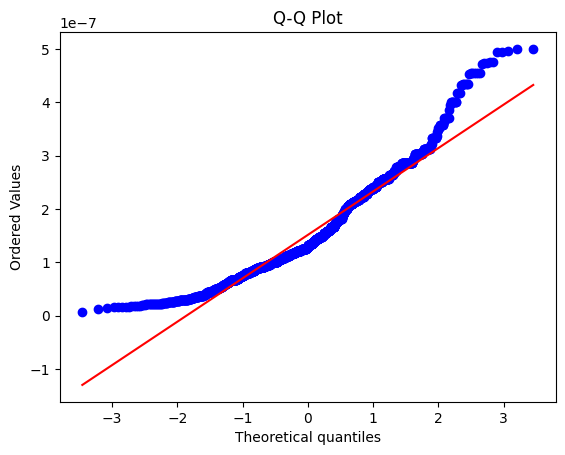

In [59]:
epsilon = 1e-6  # Маленькая константа для предотвращения деления на 0
y_inverse = 1 / (y + epsilon)

stat, p = shapiro(y_inverse)
print(f"Статистика Шапиро-Уилка: {stat}, p-значение: {p}")

# Гистограмма
plt.hist(y_inverse, bins=30, edgecolor='k', alpha=0.7)
plt.title("Гистограмма распределения")
plt.show()

# Q-Q график
stats.probplot(y_inverse, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

Статистика Шапиро-Уилка: 0.9937231640445507, p-значение: 6.526371232063766e-09


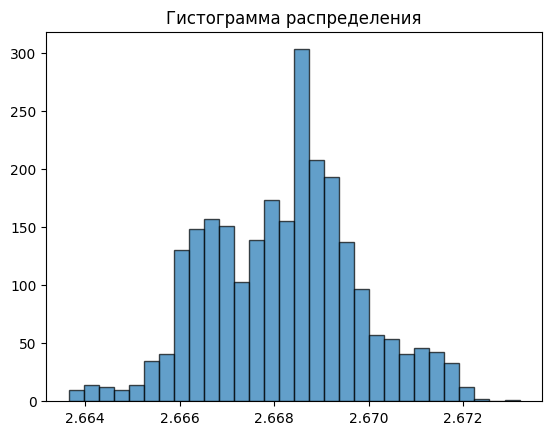

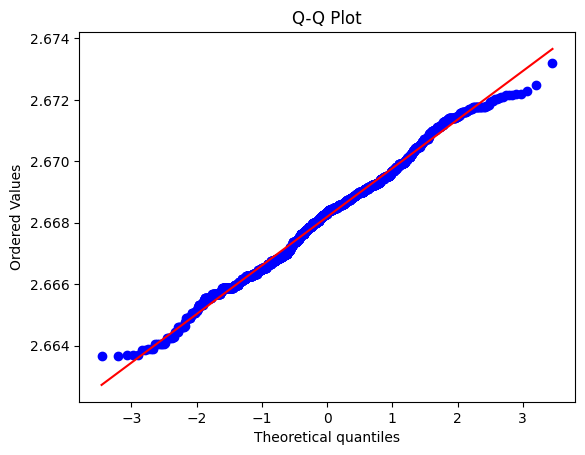

In [61]:
from scipy.stats import boxcox

y_boxcox, lambda_bc = boxcox(y + 1)

stat, p = shapiro(y_boxcox)
print(f"Статистика Шапиро-Уилка: {stat}, p-значение: {p}")

# Гистограмма
plt.hist(y_boxcox, bins=30, edgecolor='k', alpha=0.7)
plt.title("Гистограмма распределения")
plt.show()

# Q-Q график
stats.probplot(y_boxcox, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [62]:
from scipy.stats import skew

skewness = skew(y_log)
print(f"Скошенность: {skewness}")

skewness = skew(y_boxcox)
print(f"Скошенность: {skewness}")


Скошенность: 0.6977381891845652
Скошенность: 0.01681466792233


#Наичнаем предобработку данных#

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
y_log

,Price
0,15.756839
1,17.182806
2,15.701064
3,15.562796
4,15.552286
...,...
2513,16.213406
2514,17.073607
2515,16.403275
2516,16.195057


In [92]:
X.shape, y.shape

((2518, 38), (2518,))

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.3, random_state=42)
X_train.shape, y_train.shape

((1762, 38), (1762,))

#Используем регуляризацию#

##Модель без регуляризаций##

In [103]:
multiple_lr = LinearRegression().fit(X_train, y_train)

# Сохраняем массив с результатами оценки качества
mse = cross_val_score(multiple_lr,
                     X_train,
                     y_train,
                     scoring='neg_mean_squared_error',
                     cv=10)

# Получение среднего значения метрик для оценки качества модели
mse.mean()

-0.10508410352779189

In [104]:
multiple_lr_coeffs = multiple_lr.coef_
multiple_lr_coeffs

array([ 0.41289226,  0.06258976,  0.02829261, -0.11330088, -0.11240598,
        0.2435033 ,  0.19175965, -0.12602475, -0.03311264,  0.03917223,
        0.07969865,  0.03406702, -0.07638397,  0.18976266,  0.05037713,
       -0.39984907, -0.10977492,  0.11854587,  0.03649477, -0.18115661,
        0.05231694,  0.17478787,  0.10653735,  0.04109363, -0.04743866,
        0.22859137, -0.18724546,  0.08914832,  0.04866316,  0.11777211,
       -0.00108216, -0.39418387, -0.42840638,  0.23438563,  0.09388334,
       -0.15764886, -0.04035504,  0.24431445])

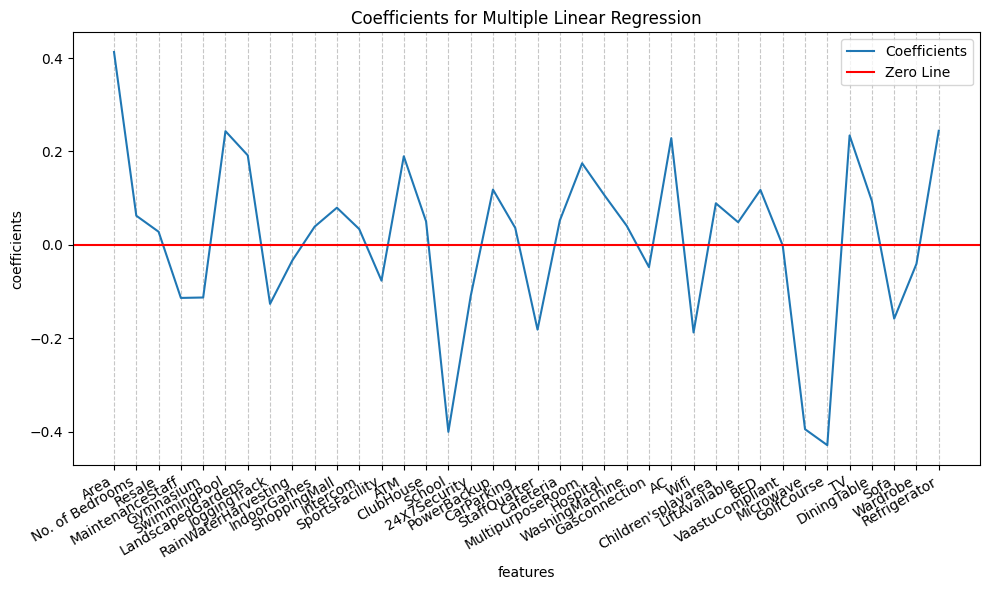

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(multiple_lr_coeffs)), multiple_lr_coeffs, label="Coefficients")
plt.axhline(0, color='r', linestyle='solid', label="Zero Line")

# Регулируем подписи
plt.xticks(
    range(len(feature_names)),  # Количество делений
    feature_names,  # Имена признаков
    rotation=30,  # Уменьшаем угол наклона
    ha='right'  # Выравнивание подписей
)

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Добавляем вертикальную сетку
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.legend()
plt.tight_layout()  # Для корректного расположения подписей
plt.show()


##Ridge (L2-регуляризация)##


In [95]:
from sklearn.linear_model import Ridge

# Импорт класса GridSearchCV из модуля model_selection scikit-learn
from sklearn.model_selection import GridSearchCV

# Создание словаря, содержащего потенциальные значения альфа
alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

# Передача в GridSearchCV Ridge-модели, потенциальных альфа-значений,
# метрики качества
ridge = GridSearchCV(Ridge(),
                     alpha_values,
                     scoring='neg_mean_squared_error',
                     cv=10)

# обучение модели
print('Лучшее значение alpha:', ridge.fit(X_train,y_train).best_params_)

# Вывод среднего значения neg_mean_squared_error
print('Метрика качества:', ridge.fit(X_train,y_train).best_score_)

Лучшее значение alpha: {'alpha': 3}
Метрика качества: -0.10479832803613906


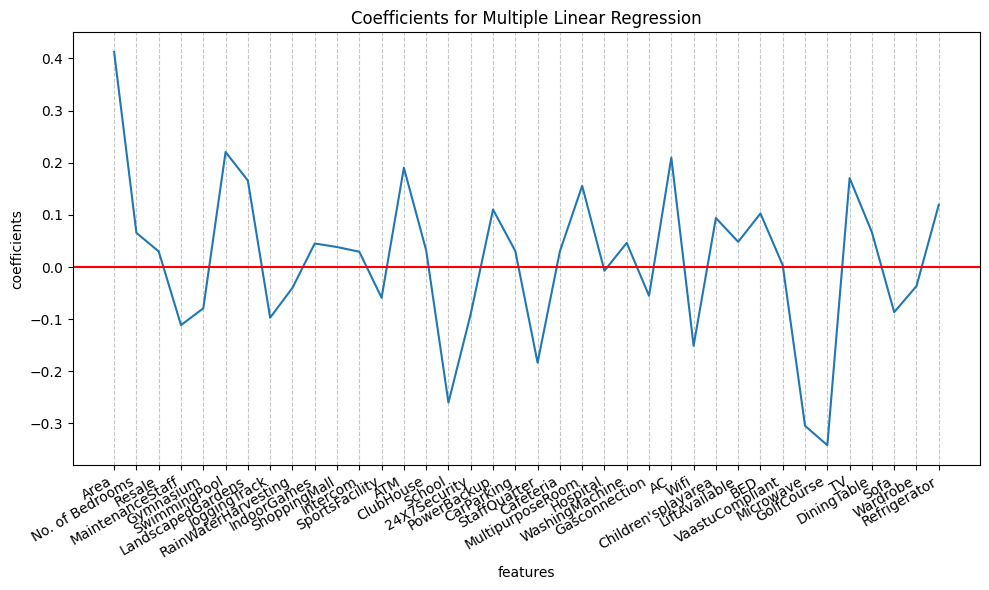

In [96]:
import matplotlib.pyplot as plt

best_ridge_model = Ridge(alpha=3)

# Извлечение оценок коэффициентов для всех десяти признаков
best_ridge_coeffs = best_ridge_model.fit(X_train,y_train).coef_


feature_names = X.columns

# Используем matplotlib для построения графика
plt.figure(figsize=(10, 6))
plt.plot(range(len(feature_names)), best_ridge_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')

plt.xticks(
    range(len(feature_names)),  # Количество делений
    feature_names,  # Имена признаков
    rotation=30,  # Уменьшаем угол наклона
    ha='right'  # Выравнивание подписей
)
plt.title("Coefficients for Multiple Linear Regression")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.tight_layout()
plt.show()

##Lasso (L1-регуляризация)##

In [111]:
from sklearn.linear_model import Lasso

# Создание словаря, содержащего потенциальные значения альфа
alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

# Передача в GridSearchCV модели, потенциальных альфа-значений,
# метрики качества

lasso = GridSearchCV(Lasso(),
                     alpha_values,
                     scoring='neg_mean_squared_error',
                     cv=10)

# Обучение модели
print('Лучшее значение alpha:', lasso.fit(X_train,y_train).best_params_)

# Вывод среднего значения neg_mean_squared_error
print('Метрика качества:', lasso.fit(X_train,y_train).best_score_)

Лучшее значение alpha: {'alpha': 0.001}
Метрика качества: -0.10606126142555272


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.110e+00, tolerance: 6.855e-02
  model = cd_fast.enet_coordinate_descent(


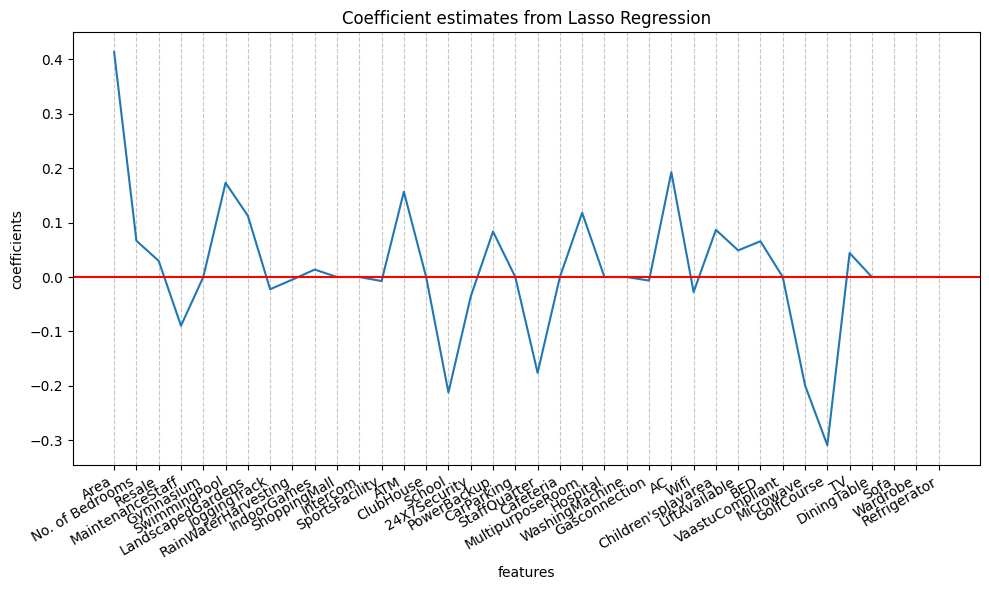

In [101]:
# Создание объекта, содержащего наилучшую Lasso-модель
best_lasso_model = Lasso(alpha=0.001)

# сохранение значений коэффициентов для всех десяти признаков
best_lasso_coeffs = best_lasso_model.fit(X_train, y_train).coef_

# Построение графика значений коэффициентов для всех десяти объектов
plt.figure(figsize = (10, 6))
plt.plot(range(len(feature_names)), best_lasso_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(
    range(len(feature_names)),  # Количество делений
    feature_names,  # Имена признаков
    rotation=30,  # Уменьшаем угол наклона
    ha='right'  # Выравнивание подписей
)
plt.title("Coefficient estimates from Lasso Regression")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.tight_layout()
plt.show()

##Elastic Net регуляризация##

In [109]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Отключаем предупреждения о сходимости
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [117]:
from sklearn.linear_model import ElasticNet

alpha_values = {'alpha': [0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
                'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}

elastic = GridSearchCV(ElasticNet(),
                       alpha_values,
                       scoring='neg_mean_squared_error',
                       cv=10)

print(elastic.fit(X_train, y_train).best_params_)

print(elastic.fit(X_train, y_train).best_score_)

{'alpha': 0.001, 'l1_ratio': 0.1}
-0.10496908136431723


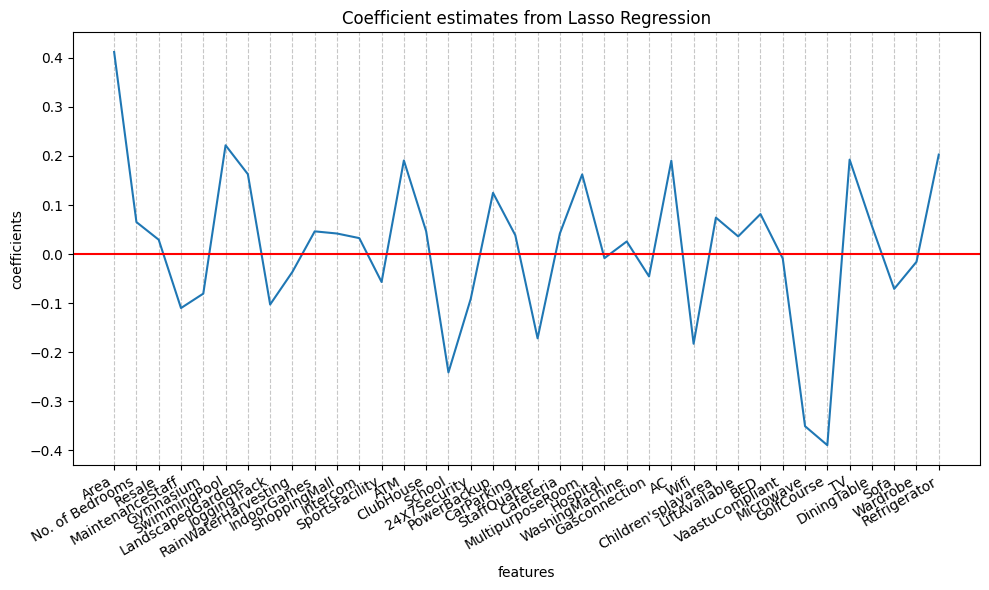

In [118]:
# Создание объекта, содержащего наилучшую Lasso-модель
best_elastic_model = ElasticNet(alpha=0.001, l1_ratio=0.1)

# сохранение значений коэффициентов для всех десяти признаков
best_elastic_coeffs = best_elastic_model.fit(X_train, y_train).coef_

# Построение графика значений коэффициентов для всех десяти объектов
plt.figure(figsize = (10, 6))
plt.plot(range(len(feature_names)), best_elastic_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(
    range(len(feature_names)),  # Количество делений
    feature_names,  # Имена признаков
    rotation=30,  # Уменьшаем угол наклона
    ha='right'  # Выравнивание подписей
)
plt.title("Coefficient estimates from Lasso Regression")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.tight_layout()
plt.show()

#Сравнение моделей base, Ridge, Lasso, Elastic Net#

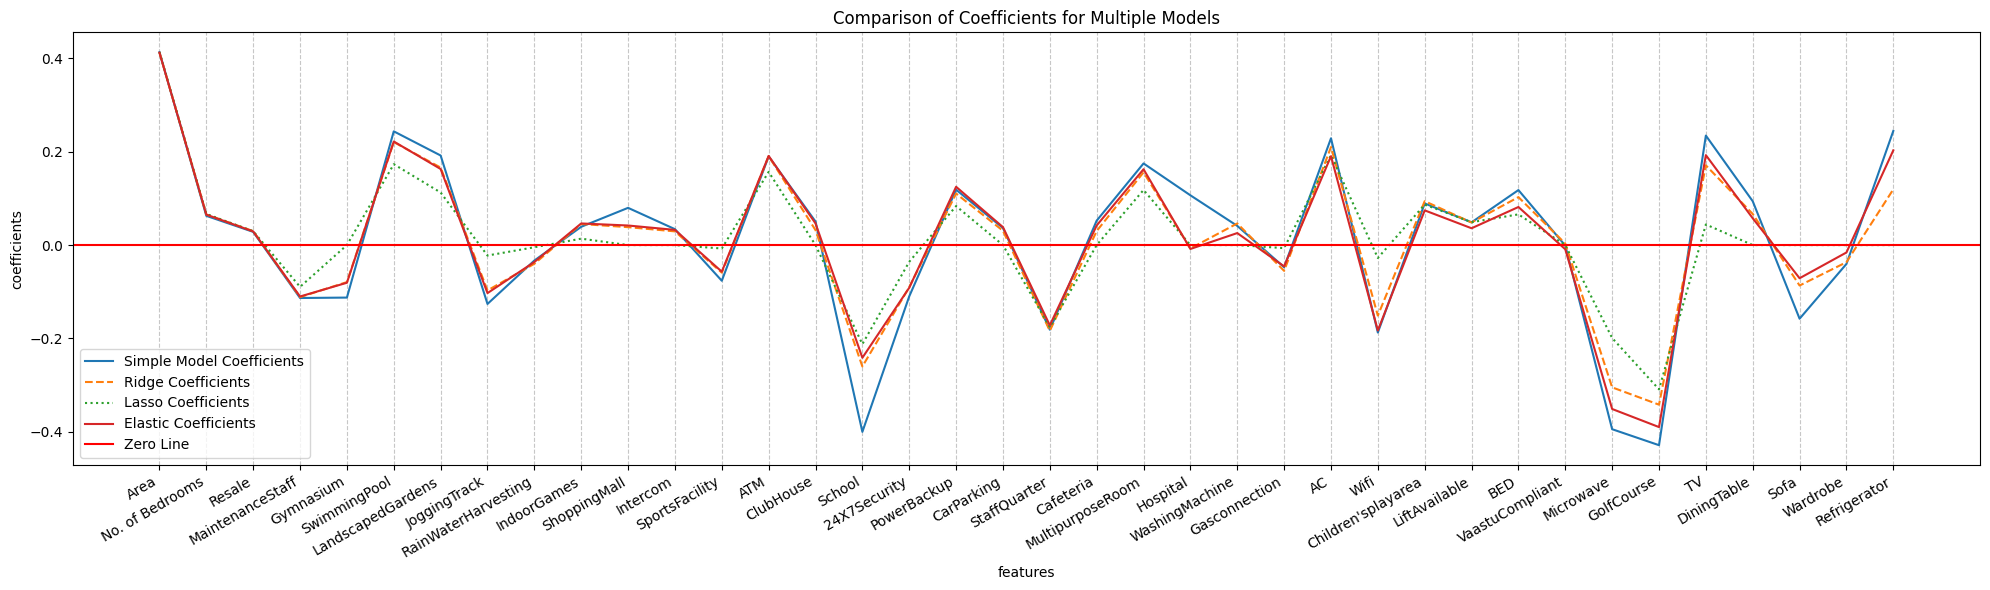

In [119]:
# Пример данных для нескольких наборов коэффициентов
coeffs_set_1 = multiple_lr_coeffs  # Первые коэффициенты
coeffs_set_2 = best_ridge_coeffs  # Пример: масштабирование других коэффициентов
coeffs_set_3 = best_lasso_coeffs  # Пример: противоположные значения
coeffs_set_4 = best_elastic_coeffs

# Построение графика
plt.figure(figsize=(20, 6))

# Отображение всех кривых
plt.plot(range(len(coeffs_set_1)), coeffs_set_1, label="Simple Model Coefficients")
plt.plot(range(len(coeffs_set_2)), coeffs_set_2, label="Ridge Coefficients", linestyle='--')
plt.plot(range(len(coeffs_set_3)), coeffs_set_3, label="Lasso Coefficients", linestyle=':')
plt.plot(range(len(coeffs_set_4)), coeffs_set_4, label="Elastic Coefficients", linestyle='-')

# Линия на уровне 0
plt.axhline(0, color='r', linestyle='solid', label="Zero Line")

# Настройка подписей оси x
plt.xticks(
    range(len(feature_names)),  # Количество делений
    feature_names,  # Имена признаков
    rotation=30,  # Уменьшаем угол наклона
    ha='right'  # Выравнивание подписей
)

# Настройка осей, сетки и легенды
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title("Comparison of Coefficients for Multiple Models")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.legend()  # Добавляем легенду
plt.tight_layout()  # Для корректного расположения подписей
plt.show()


In [120]:
comparing_models = pd.DataFrame({'without_regularization': multiple_lr_coeffs,
                                 'Ridge': best_ridge_coeffs,
                                 'Lasso': best_lasso_coeffs,
                                 'Elastic': best_elastic_coeffs},
                                 index=feature_names)

display(comparing_models)

,without_regularization,Ridge,Lasso,Elastic
Area,0.412892,0.412367,0.413360,0.411931
No. of Bedrooms,0.062590,0.065481,0.066641,0.065198
Resale,0.028293,0.029872,0.029652,0.029230
MaintenanceStaff,-0.113301,-0.111416,-0.089445,-0.110086
Gymnasium,-0.112406,-0.079235,-0.000000,-0.080661
SwimmingPool,0.243503,0.220520,0.173122,0.221745
LandscapedGardens,0.191760,0.165895,0.112546,0.162861
JoggingTrack,-0.126025,-0.097150,-0.022375,-0.102826
RainWaterHarvesting,-0.033113,-0.040002,-0.004646,-0.036232
IndoorGames,0.039172,0.045143,0.013742,0.046288


##Вывод##

Сравнивая результаты регуляризаций, наилучшим образом отработала Ridge. Можно было бы использовать ElasticNet, так как погрешность между ними очень маленькая, но, судя по таблицу, elastic не зануляет ни один признак, следовательно, его использование не дает преимущества.